<a href="https://colab.research.google.com/github/bani1610/Machine-Learning-Praktikum/blob/main/praktikum13/notebook/tugas13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
kaggle = '/content/kaggle.json'

In [3]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 853MB/s]


In [5]:
from zipfile import ZipFile
import os

file_name = 'handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name,'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [6]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
dataset_path = '/content/dataset'
img_size = 28
data = []
labels = []

In [13]:
# Loop folder 0-9 untuk membaca gambar
for label in range(10):  # Angka 0 sampai 9
    folder_path = os.path.join(dataset_path, str(label))
    # Cek apakah folder ada
    if os.path.exists(folder_path):
        for img_name in os.listdir(folder_path):
            try:
                # Baca gambar & ubah ke grayscale (hitam putih)
                img_path = os.path.join(folder_path, img_name)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Resize gambar agar seragam (28x28)
                new_array = cv2.resize(img_array, (img_size, img_size))

                # Masukkan ke list
                data.append(new_array)
                labels.append(label)
            except Exception as e:
                pass # Lewati jika ada file rusak

In [14]:
X = np.array(data) / 255.0
y = np.array(labels)

print(f"Selesai! Total Data: {len(X)}")
print(f"Ukuran Gambar: {X.shape[1]}x{X.shape[2]}")

Selesai! Total Data: 21555
Ukuran Gambar: 28x28


In [15]:
X_train, X_test, y_train, y_test = train_test_split
(X, y, test_size=0.2, random_state=42)

In [25]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

# Hidden Layer 1 (lebih lebar dan dengan BatchNormalization)
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Hidden Layer 2 (lebih lebar dan dengan BatchNormalization)
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Hidden Layer 3 (baru, dengan BatchNormalization)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [31]:
from tensorflow.keras.optimizers import Adam

# Coba learning rate yang lebih kecil untuk Adam
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Tampilkan struktur model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,554 (955.29 KB)

 Trainable params: 243,658 (951.79 KB)

 Non-trainable params: 896 (3.50 KB)

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\nMulai Training...")
history = model.fit(X_train, y_train,
                    epochs=50,             #
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)


Mulai Training...
Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5329 - loss: 1.4326 - val_accuracy: 0.3065 - val_loss: 3.0619
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5697 - loss: 1.3309 - val_accuracy: 0.5254 - val_loss: 1.4324
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5756 - loss: 1.2943 - val_accuracy: 0.4393 - val_loss: 1.7241
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5899 - loss: 1.2429 - val_accuracy: 0.3389 - val_loss: 2.3797
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6075 - loss: 1.1925 - val_accuracy: 0.5181 - val_loss: 1.4084
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6166 - loss: 1.1743 - val_accuracy: 0.4201 - val_loss: 1.8409
Epoch 7/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6312 - loss: 1.1330 - val_accuracy: 0.4071 - val_loss: 2.1243
Epoch 8/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6454 - loss: 1.10

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nAccuracy pada Data Test: {test_acc * 100:.2f}%")

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5776 - loss: 1.2451

Accuracy pada Data Test: 58.78%


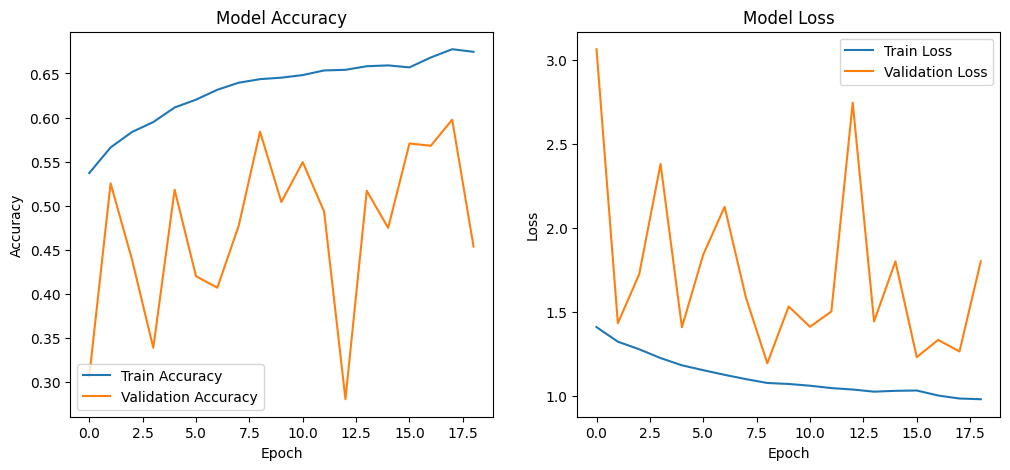

In [34]:
# Plot Grafik
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

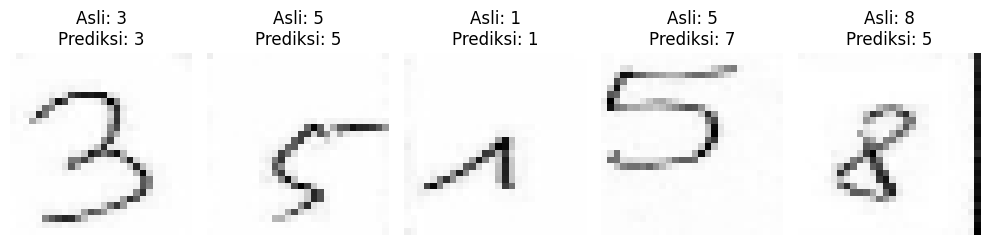

In [35]:
# Test Prediksi Beberapa Gambar

plt.figure(figsize=(10, 5))

num_predictions = 5 # Number of predictions to display

for i in range(num_predictions):
    plt.subplot(1, num_predictions, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    predicted_label = np.argmax(model.predict(X_test[i].reshape(1,28,28), verbose=0))
    plt.title(f"Asli: {y_test[i]}\nPrediksi: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()